In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Business Study - Effectiveness of Marketing on Sales

Objective: Understand the impact of marketing costs on sales to determine how effective the current marketing strategy is and identify regions where the effectiveness may plateau. This can allow us to optimize the marketing costs to maximize profitbality and sales.

Rationale: Marketing is a significant factor in creating sales, however it is important identify where the marketing costs begin to become inefficient. The data analysis will help answer the question if at any point where the inefficiency takes place or that there is a linear relationship between sales and marketing.

Hypothesis: Marketing costs are positively correlated with sales across various product lines and markets. However, we also anticipiate identifying a point of diminishing returns where the incremental benefir of additional marketing spend decreases


**Methodology:**

* Data Analysis: Use historical sales data to understand the relationship between sales and marketing expenditures

* Regression Modeling: Create models to visualize the impact of marketing on sales and identify the points of diminishing returns

* Comparitive Analysis: Compare sales performance before and after reaching the hypothesized thresholds to validate the exisitence of diminishing returns


**Expected Outcomes:**

 * Establish a clear relationship between marketing costs and sales
 
 * Identify the point in marketing spend where the ROI beings to decline
 
 * Provide strategiv recommendation on optimaal marketing spends for maximizing sales
 

**Significance:**

Enable the business to make more informed decisions in regard to the marketing budgets, ensuring the funds are used to achieve maximum impact on sales


#### Exploratory Data Analysis

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
df = pd.read_csv('/kaggle/input/coffee-chain-sales-dataset/Coffee_Chain_Sales .csv')

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
# Check if we have missing data 

df.isnull().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

In [26]:
# Check for duplicate rows

df.duplicated().sum()

0

In [27]:
# Outlier detection 

df.describe([x*0.1 for x in range(10)])

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
0%,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
10%,262.000000,25.000000,-34.000000,321.000000,32.000000,7.000000,-4.000000,61.000000,20.000000,30.000000,10.000000,50.000000,19.000000
20%,360.000000,36.000000,-20.000000,411.000000,47.000000,12.000000,12.000000,86.000000,30.000000,40.000000,20.000000,70.000000,26.000000
30%,435.000000,45.000000,-13.000000,482.000000,59.000000,14.000000,22.000000,109.000000,30.000000,50.000000,30.000000,90.000000,37.000000
40%,509.000000,51.000000,-8.000000,572.000000,68.000000,17.000000,30.000000,122.000000,40.000000,60.000000,40.000000,100.000000,42.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000


`DifferenceBetweenActualandTargetProfit`, `Inventory Margin`, `Margin`, and `Profit` all seem to show some outliers. To further investigate, let's examine an outlier row in more detail

In [58]:
fig = px.histogram(df, 
                   x = 'DifferenceBetweenActualandTargetProfit', 
                   nbins = 75, 
                   title = 'Distributions of Difference Between Actual and Target Profits', 
                   labels={'DifferenceBetweenActualandTargetProfit': 'Difference Between Actual and Target Profit'},
                   marginal = 'rug',
                   hover_data = df.columns,
                   template = 'plotly_white')
fig.show()

It looks like Green Tea seems to be the problematic product in Nevada. There are three instances of it showing very low profit. Let's comapre Green Tea across different markets.

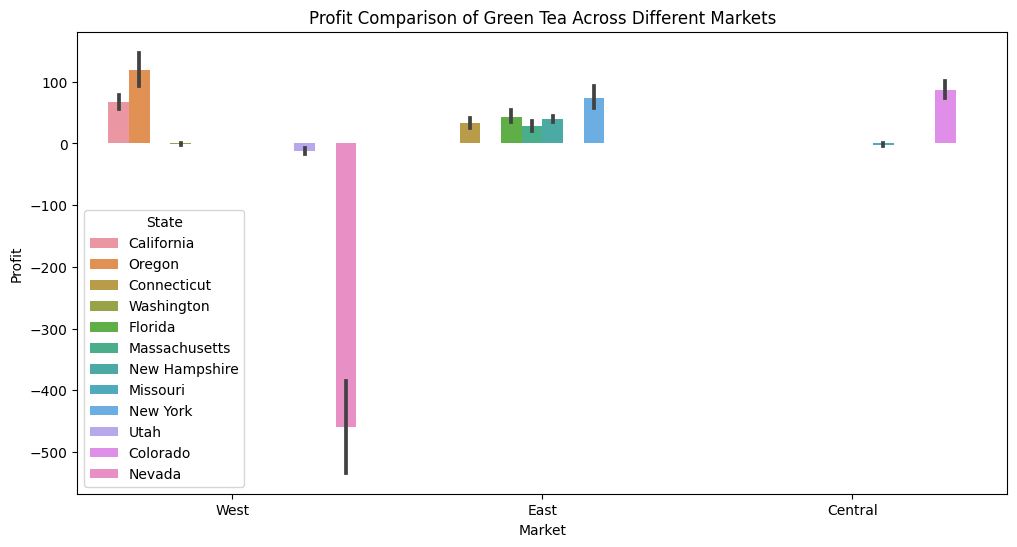

In [59]:
# Filter data for 'Green Tea' across all markets
green_tea_data = df[(df['Product'] == 'Green Tea')]

# Plot to compare sales and profits in different markets
plt.figure(figsize=(12, 6))
sns.barplot(data=green_tea_data, x='Market', y='Profit', hue='State')
plt.title('Profit Comparison of Green Tea Across Different Markets')
plt.show()

There clearly seems to be an issue with two stores **(702 and 775)** in Nevada displaying very low profits. The next step would be to analyze the performance of different products in the same market 

/tmp/ipykernel_34/803935318.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




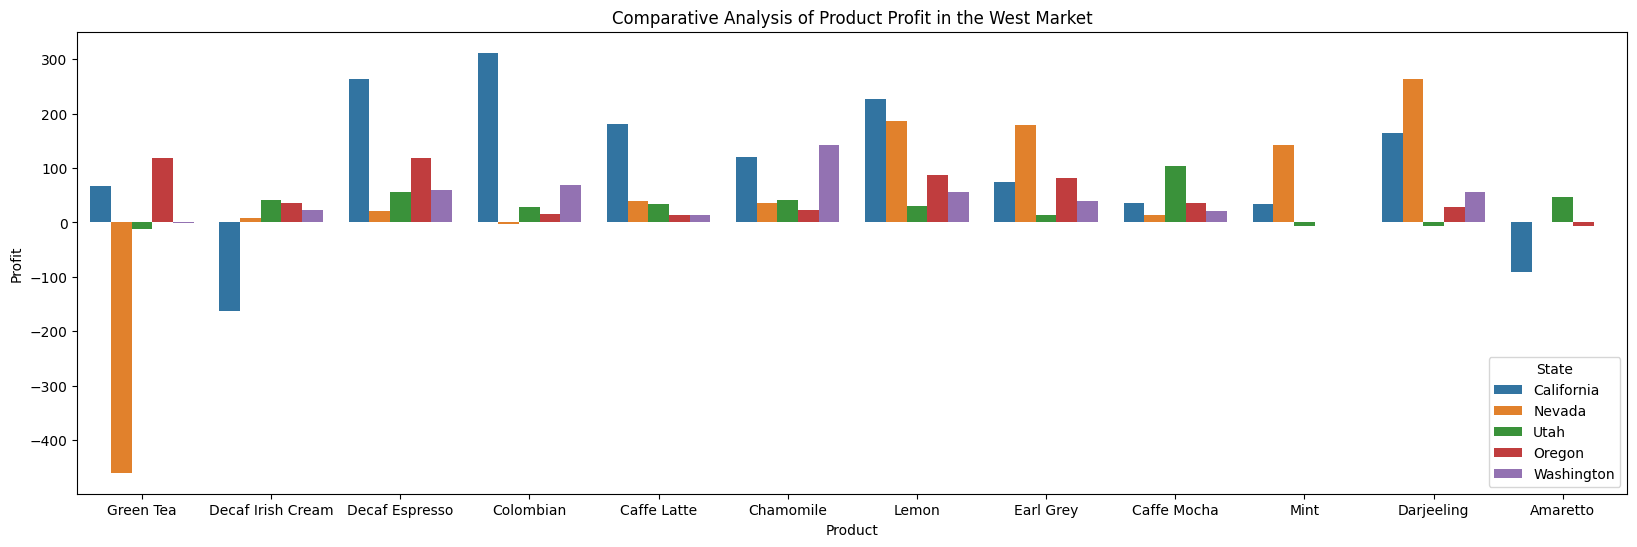

In [60]:
west_market_data = df[df['Market']=='West']

plt.figure(figsize = (20,6))
sns.barplot(data= west_market_data, x='Product', y='Profit', ci = None, hue = 'State')
plt.title('Comparative Analysis of Product Profit in the West Market')
plt.show()


Once again Green Tea seems to be the only issue in Nevada. To further understand the low profit, it would be useful to analyze the inventory margin. The current hypothesis is that too much stock could have been ordered.

In [ ]:
# Filter for Green Tea in Nevada
green_tea_nv = df[(df['Product'] == 'Green Tea') & (df['State'] == 'Nevada')]

# Plot inventory margin and profit over time
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(data=green_tea_nv, x='Date', y='Inventory Margin', label='Inventory Margin')
plt.title('Inventory Margin Over Time')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=green_tea_nv, x='Date', y='Profit', label='Profit', color='red')
plt.title('Profit Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation analysis
print("Correlation between Inventory Margin and Profit:", green_tea_nv['Inventory Margin'].corr(green_tea_nv['Profit']))


We can see a slight negative correlation that as inventory margin increases, the profit for green tea decreases. This further supports our hypothesis that overstocking could be the cause for low profits of Green Tea sales in Nevada. In order to avoid this in the future, let's conduct an inventory analysis to optimize inventory levels.

The first step would to calculate the inventory turnover ratio. This is to show how many times the inventory is sold and replaced over a specific period. 

- High turnover ratio tells us that the company is selling its inventory quickly and efficiently

- Low turnover ratio indicates poor stock management

In [15]:
inventory_turnover = green_tea_nv['Inventory Turnover'] = green_tea_nv['Sales'] / green_tea_nv['Inventory Margin']

print(inventory_turnover)

917     0.002975
944     0.004181
971     0.003757
1005    0.003117
1032    0.004443
1059    0.003999
dtype: float64


/tmp/ipykernel_34/2831424696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_turnover = green_tea_nv['Inventory Turnover'] = green_tea_nv['Sales'] / green_tea_nv['Inventory Margin']


From what we have seen, the outlier is not a human data error, but rather an anamoly. The decision would be to remove this entry to prevent a skewed analysis. However, we must take into account inventory optimization techniques to prevent an event like this occuring again.

In [18]:
filtered_data = df[df['DifferenceBetweenActualandTargetProfit'] != -369]

In [19]:
remove_outlier.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,586.921772,82.236569,0.735156,809.291235,102.760603,30.371348,61.121583,191.209237,71.639962,97.012253,60.386428,168.652215,53.765316
std,225.377722,64.637623,42.874967,896.288375,90.666917,25.897434,98.861907,148.249253,65.722017,89.283462,77.539652,145.932178,31.634269
min,203.000000,0.000000,-285.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,17.000000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,40.000000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,959.000000,130.000000,40.000000,87.000000,228.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000
